# Exploratory Analysis 2 🗺️ 📈 

In [5284]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5285]:
import random
# Get random arr, nsr and chf data
'''
arr: 1 - 96
chf: 97 = 126
nsr: 127 = 162
'''

#function to generate random number between two numbers
def rand_num(a, b):
    return int((b - a) * random.random() + a)



## Applying Filters 🚬

### Applying Sin Wave Filter 🌊


In [5286]:
import numpy as np

v = np.linspace(0.5 * np.pi, 1.5 * np.pi, 15)
peak_filter = np.sin(v)
def apply_wave_filter(signals):
    return pd.DataFrame(np.correlate(signals, peak_filter, mode='same'))

### Fourier Transform 🥖 🇫🇷 🌊


In [5287]:
from scipy.fft import fft, fft2, fftfreq

def fft_filter(signals):
    return pd.DataFrame(np.abs(fft(signals.to_frame())))

def fft2_filter(signals):
    return pd.DataFrame(np.abs(fft2(signals.to_frame())))
   
def fftfreq_filter(signals):
    return pd.DataFrame(np.abs(fftfreq(signals.to_frame().shape[0]))) 

### Moving Average 🚚 ⨏


In [5288]:
def moving_average(signals, n=100):
    return signals.rolling(n).mean()

### Moving Median 🚚 

In [5289]:
def moving_median(signals, n=10000):
    return signals.rolling(n).median()

### Loading data 💽

In [5290]:
signals = pd.read_csv("transformed_signal_data/labeled_signals.csv")
signals.head()
X = signals.copy()

y = X.pop('Label')
X_scaled = X.copy() #X.iloc[:, 0:]
X_scaled = (X_scaled - X_scaled.mean(axis=0)) / X_scaled.std(axis=0)
X_scaled.head()


,1 sec,2 sec,3 sec,4 sec,5 sec,6 sec,7 sec,8 sec,9 sec,10 sec,...,65527 sec,65528 sec,65529 sec,65530 sec,65531 sec,65532 sec,65533 sec,65534 sec,65535 sec,65536 sec
0,0.214941,0.228279,0.240475,0.260607,0.208050,0.126753,0.065538,0.115181,0.144884,0.191248,...,0.088626,0.157729,0.202158,0.201237,0.061257,0.060956,0.037360,0.224294,0.151970,-0.014293
1,0.971405,0.980312,0.916523,0.923907,0.953878,0.854252,0.576654,0.927088,0.812180,1.015764,...,0.127856,0.165076,0.181198,0.218158,0.127828,0.095513,0.087492,0.169431,0.134480,0.161639
2,0.470054,0.491595,0.464476,0.485335,0.419391,0.276981,0.239148,0.214900,0.318188,0.236900,...,-0.241655,-0.246052,-0.230415,-0.237020,-0.236365,-0.256937,-0.117470,-0.049210,0.120199,0.123864
3,-1.214460,-1.193362,-1.043654,-1.110125,-1.078175,-1.080326,-1.160086,-1.392316,-1.404631,-1.315309,...,-1.483377,-1.641919,-1.912981,-2.038179,-2.030007,-1.922285,-2.078592,-2.155253,-2.029796,-2.079041
4,-0.530949,-0.510521,-0.429843,-0.428534,-0.374319,-0.422863,-0.431010,-0.568670,-0.481407,-0.513388,...,1.187472,1.387604,1.737118,1.922601,1.955454,1.946956,2.266048,2.430764,2.285600,2.043182


In [5291]:
arr_n, chf_n, nsr_n = rand_num(1, 96), rand_num(97, 126), rand_num(127, 162)
#arr_n, chf_n, nsr_n = 50, 100, 150

assert arr_n >= 1 and arr_n <= 96
assert chf_n >= 97 and chf_n <= 126
assert nsr_n >= 127 and nsr_n <= 162

signal_arr = X_scaled.loc[16]
signal_chf = X_scaled.loc[chf_n]
signal_nsr = X_scaled.loc[nsr_n]


## Peaks 🗻


In [5292]:
from scipy.signal import find_peaks

In [5293]:
arr = signal_arr.copy()
nsr = signal_nsr.copy()
chf = signal_chf.copy()

# arr = arr[1000:6000].reset_index()
# nsr = nsr[1000:6000].reset_index()
# chf = chf[1000:6000].reset_index()

arr_sig = arr
nsr_sig = nsr
chf_sig = chf

# arr_sig = moving_median(arr.SignalData)
# nsr_sig = moving_median(nsr.SignalData)
# chf_sig = moving_median(chf.SignalData)


# arr_sig = fft_filter(arr_sig)[0]
# nsr_sig = fft_filter(nsr_sig)[0]
# chf_sig = fft_filter(chf_sig)[0]

arr_sig = fft2_filter(arr_sig)[0]
nsr_sig = fft2_filter(nsr_sig)[0]
chf_sig = fft2_filter(chf_sig)[0]

# arr_sig = fftfreq_filter(arr_sig)[0]
# nsr_sig = fftfreq_filter(nsr_sig)[0]
# chf_sig = fftfreq_filter(chf_sig)[0]


# n_average = 20 
# arr_sig = moving_average(arr_sig, n=n_average)
# nsr_sig = moving_average(nsr_sig, n=n_average)
# chf_sig = moving_average(chf_sig, n=n_average)

# n_median = 200 
# arr_sig = moving_median(arr_sig, n=n_median)
# nsr_sig = moving_median(nsr_sig, n=n_median)
# chf_sig = moving_median(chf_sig, n=n_median)


arr_sig = apply_wave_filter(arr_sig)[0]
nsr_sig = apply_wave_filter(nsr_sig)[0]
chf_sig = apply_wave_filter(chf_sig)[0]

# n_median = 200 
# arr_sig = moving_median(arr_sig, n=n_median)
# nsr_sig = moving_median(nsr_sig, n=n_median)
# chf_sig = moving_median(chf_sig, n=n_median)


#arr_sig.head()




In [5304]:
distance = 30 
p = 5500
pl = 950
w = 7 

arr_peaks, arr_peaks_props = find_peaks(arr_sig, height=0, distance=distance, prominence=(pl, p), width=w)
nsr_peaks, nsr_peaks_props = find_peaks(nsr_sig, height=0, distance=distance, prominence=(pl, p), width=w)
chf_peaks, chf_peaks_props = find_peaks(chf_sig, height=0, distance=distance, prominence=(pl, p), width=w)

# arr_peaks, arr_peaks_props = find_peaks(arr_sig, height=0, distance=distance)
# nsr_peaks, nsr_peaks_props = find_peaks(nsr_sig, height=0, distance=distance)
# chf_peaks, chf_peaks_props = find_peaks(chf_sig, height=0, distance=distance)


In [5295]:
def plot_sig(sig, peaks, title):
    plt.figure(figsize=(14, 4))
    plt.title(title)
    plt.plot(sig)
    plt.plot(peaks, sig[peaks], "x")
    plt.plot(np.zeros_like(sig), "--", color="gray")
    plt.show()

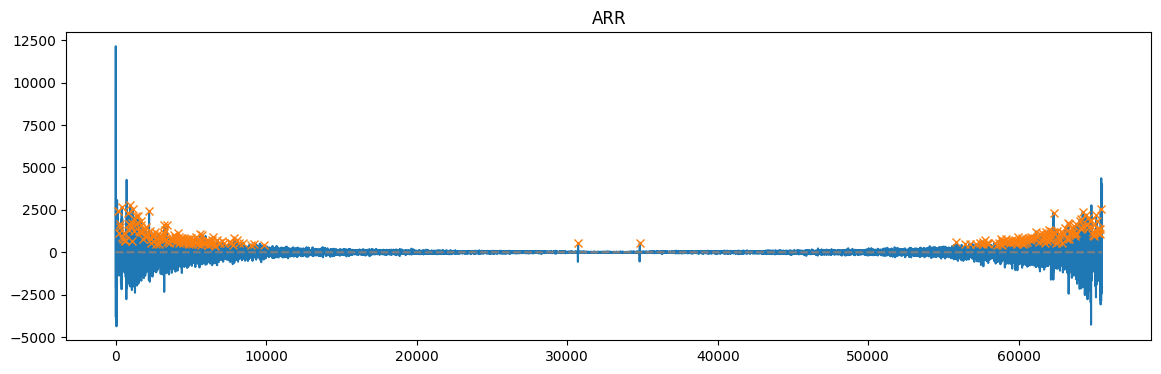

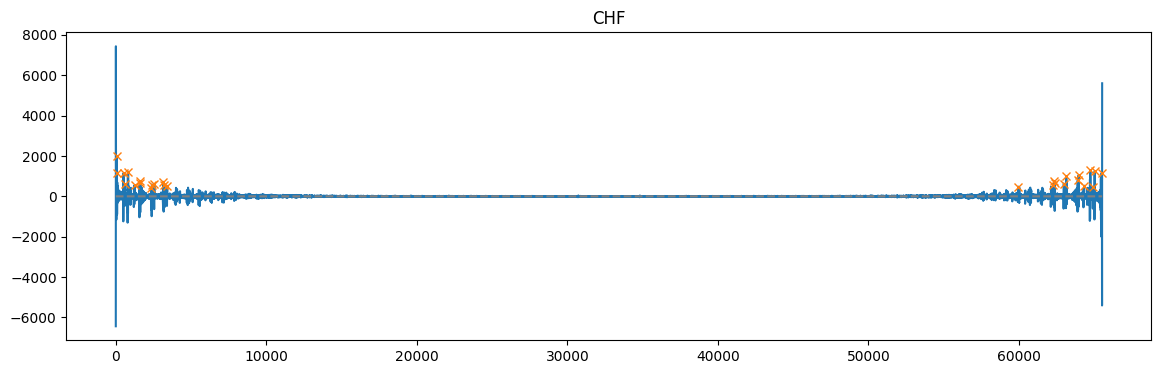

In [5305]:
plot_sig(arr_sig, arr_peaks, "ARR")
plot_sig(chf_sig, chf_peaks, "CHF")
# plot_sig(nsr_sig, nsr_peaks, "NSR")

In [5297]:

def print_info(peak, peak_props, title):
    print("----------------PEAK INFO----------------")
    print(title)
    diff = np.diff(peak)
    print("Total Peaks", len(peak))
    print("----------------DISTANCE INFO----------------")
    print(" max peak distance: ", np.max(diff))
    print(" min peak distance: ", np.min(diff))
    print(" mean peak distance: ", np.mean(diff))
    print(" mean peak distance: ", np.mean(diff))
    print(" median peak distance: ", np.median(diff))
    print(" standard deviation: ", np.std(diff))
    print(" IQR peak distance: ", np.quantile(diff, q=.75) - np.quantile(diff, q=.25))
    print("----------------Properties INFO----------------")
    print(" max prominence: ", peak_props["prominences"].max()) 
    print(" min prominence: ", peak_props["prominences"].min()) 
    print(" median prominence: ", np.median(peak_props["prominences"])) 
    print(" IQR prominence: ", np.quantile(peak_props["prominences"], q=.75) - np.quantile(peak_props["prominences"], q=.25)) 
    print(" max widths: ", peak_props["widths"].max()) 
    print(" min widths: ", peak_props["widths"].min()) 
    print(" median widths: ", np.median(peak_props["widths"])) 
    print(" IQR widths: ", np.quantile(peak_props["widths"], q=.75) - np.quantile(peak_props["widths"], q=.25)) 
    print("----------------END PEAK INFO----------------")
    

In [5298]:
print_info(arr_peaks, arr_peaks_props, "ARR Peaks")
#print_info(nsr_peaks, nsr_peaks_props, "NSR Peaks")
#print("\n\n")

----------------PEAK INFO----------------
ARR Peaks
Total Peaks 211
----------------DISTANCE INFO----------------
 max peak distance:  49556
 min peak distance:  30
 mean peak distance:  311.67619047619047
 mean peak distance:  311.67619047619047
 median peak distance:  58.5
 standard deviation:  3407.457196028505
 IQR peak distance:  44.25
----------------Properties INFO----------------
 max prominence:  5432.4903124335015
 min prominence:  1219.1258820510402
 median prominence:  1905.635150125489
 IQR prominence:  1228.595086377634
 max widths:  25.25344761048882
 min widths:  5.194183320782031
 median widths:  9.626993154182856
 IQR widths:  3.418628675065861
----------------END PEAK INFO----------------


In [5299]:
print_info(chf_peaks, chf_peaks_props, "CHF Peaks")

----------------PEAK INFO----------------
CHF Peaks
Total Peaks 19
----------------DISTANCE INFO----------------
 max peak distance:  59201
 min peak distance:  30
 mean peak distance:  3636.1111111111113
 mean peak distance:  3636.1111111111113
 median peak distance:  360.0
 standard deviation:  13479.355758133286
 IQR peak distance:  636.5
----------------Properties INFO----------------
 max prominence:  3157.7741243440396
 min prominence:  1220.9406430099507
 median prominence:  1741.31571852534
 IQR prominence:  912.3310431428658
 max widths:  59.208677437564575
 min widths:  6.951557407090149
 median widths:  12.680226645265066
 IQR widths:  5.164413065828253
----------------END PEAK INFO----------------
